In [0]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import math
import numpy as np

In [0]:
(X_Train,_),(_,_) = mnist.load_data()  

In [0]:
print(X_Train.shape)
print(type(X_Train))

X_Train = X_Train.reshape((*(X_Train.shape),1))
print(X_Train.shape)

(60000, 28, 28)
<class 'numpy.ndarray'>
(60000, 28, 28, 1)


In [0]:
#Normalize the Data between -1 and 1

X_Train = (X_Train.astype('float32') - 127.5)/127.5

print(np.min(X_Train))
print(np.max(X_Train))

-1.0
1.0


In [0]:
NUM_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(X_Train.shape[0]/float(BATCH_SIZE))
HALF_BATCH_SIZE = int(BATCH_SIZE/2)

NOISE_DIM = 100

adam = Adam(lr=2e-4,beta_1=0.5)

In [0]:
# Learnable Upsampling by Using Transpose Convolution

# Start from 7 X 7 X 128
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#Double the Activation Size 14 X 14 X 64
#generator.add(UpSampling2D())
#generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(Conv2DTranspose(64, kernel_size=(5,5), strides=(2, 2), padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double the Activation Size 28 X 28 X 1
#generator.add(UpSampling2D())
#generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', activation='tanh'))
generator.add(Conv2DTranspose(1, kernel_size=(5,5), strides=(2, 2), padding='same',activation='tanh'))
                
                
# Final Output (No ReLu or Batch Norm)
generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()



#Discriminator - Downsampling
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

# Prefer Strided Convolutions over MaxPooling
discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))


discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 6272)              633472    
_________________________________________________________________
reshape_7 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 14, 14, 64)        256       
__________

In [0]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

def save_imgs(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()
  


In [0]:
!mkdir images

In [0]:
X_Train.shape

(60000, 28, 28, 1)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 D loss: 154.806459 G loss: 247.957154
Epoch 2 D loss: 164.423911 G loss: 204.247596
Epoch 3 D loss: 161.274602 G loss: 203.206296
Epoch 4 D loss: 160.838316 G loss: 202.089809
Epoch 5 D loss: 161.896840 G loss: 198.062456
Epoch 6 D loss: 162.121604 G loss: 196.020365
Epoch 7 D loss: 162.102278 G loss: 194.686066
Epoch 8 D loss: 162.074975 G loss: 193.837040
Epoch 9 D loss: 161.882719 G loss: 193.387483
Epoch 10 D loss: 161.800050 G loss: 193.403200


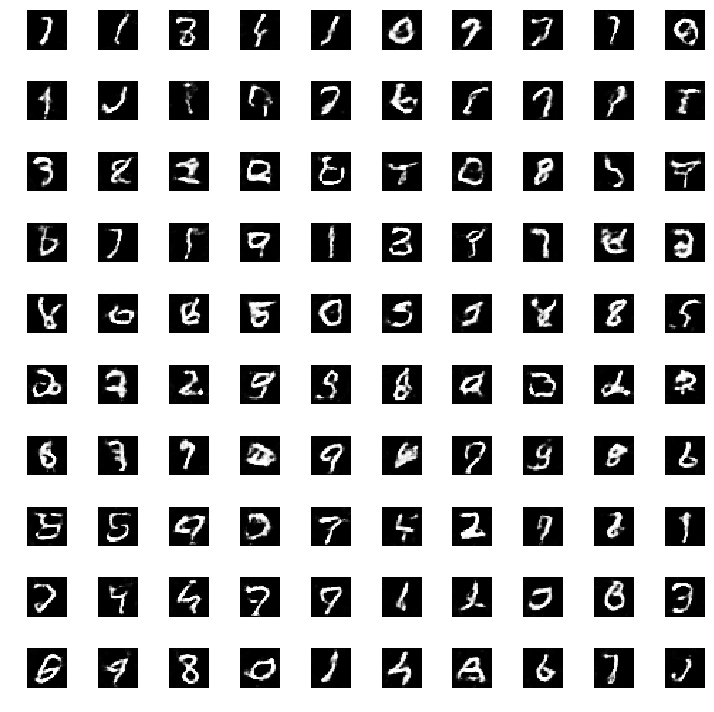

Epoch 11 D loss: 161.702785 G loss: 193.313892
Epoch 12 D loss: 161.436783 G loss: 196.192215
Epoch 13 D loss: 161.456259 G loss: 193.782340
Epoch 14 D loss: 161.498855 G loss: 192.957143
Epoch 15 D loss: 161.405795 G loss: 193.884775
Epoch 16 D loss: 161.040370 G loss: 197.753903
Epoch 17 D loss: 161.212016 G loss: 193.494714
Epoch 18 D loss: 161.121645 G loss: 195.228706
Epoch 19 D loss: 160.710947 G loss: 198.676445
Epoch 20 D loss: 160.848707 G loss: 194.424858


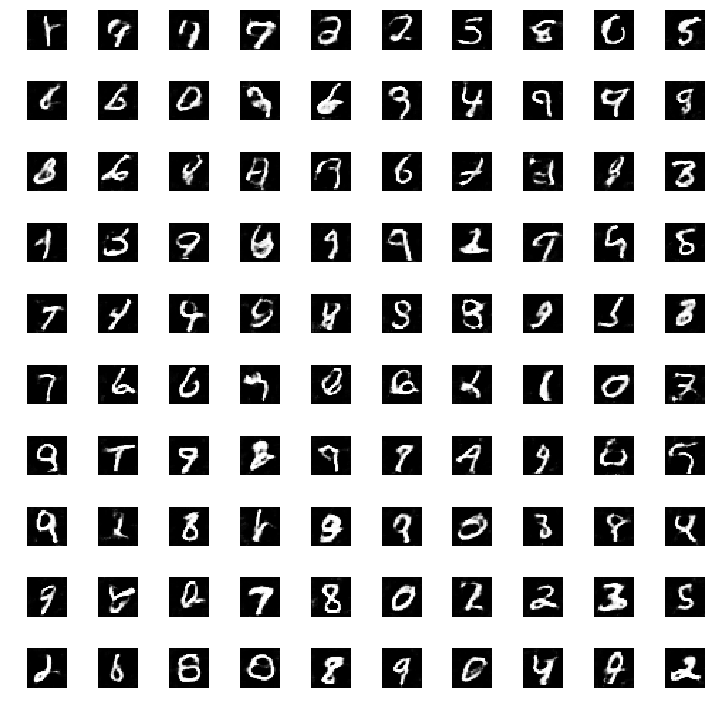

Epoch 21 D loss: 160.768052 G loss: 195.375421
Epoch 22 D loss: 160.660754 G loss: 196.419619
Epoch 23 D loss: 160.359176 G loss: 199.592511
Epoch 24 D loss: 160.402171 G loss: 197.006862
Epoch 25 D loss: 160.246251 G loss: 197.514624
Epoch 26 D loss: 160.077729 G loss: 198.389041
Epoch 27 D loss: 159.959963 G loss: 199.023333
Epoch 28 D loss: 159.762905 G loss: 199.268175
Epoch 29 D loss: 159.715368 G loss: 199.992619
Epoch 30 D loss: 159.496988 G loss: 201.147648


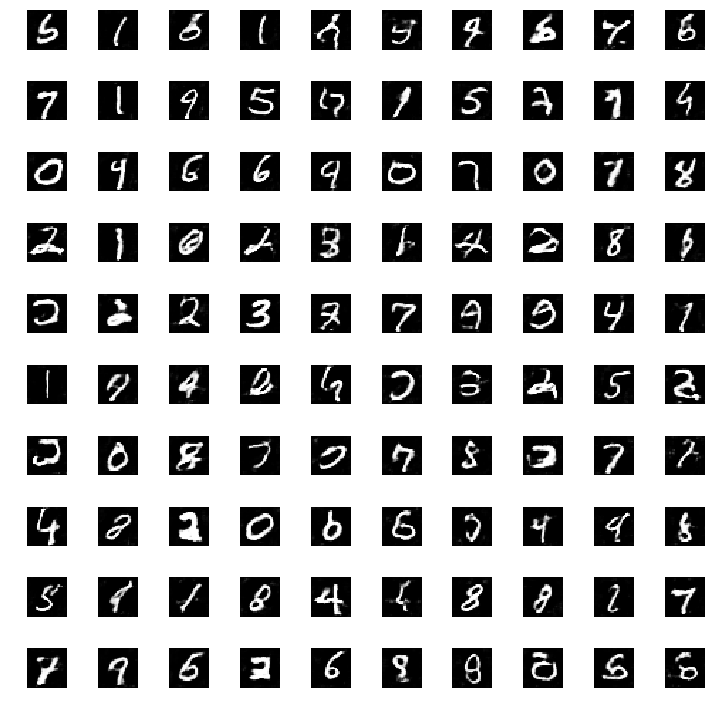

Epoch 31 D loss: 158.971252 G loss: 205.992669
Epoch 32 D loss: 158.980851 G loss: 201.564184
Epoch 33 D loss: 158.769521 G loss: 202.742552
Epoch 34 D loss: 158.774534 G loss: 204.169057
Epoch 35 D loss: 158.536687 G loss: 204.830975
Epoch 36 D loss: 158.148204 G loss: 205.548424
Epoch 37 D loss: 158.013466 G loss: 206.629389
Epoch 38 D loss: 157.738651 G loss: 207.669187
Epoch 39 D loss: 157.512088 G loss: 208.874987
Epoch 40 D loss: 157.390651 G loss: 209.348411


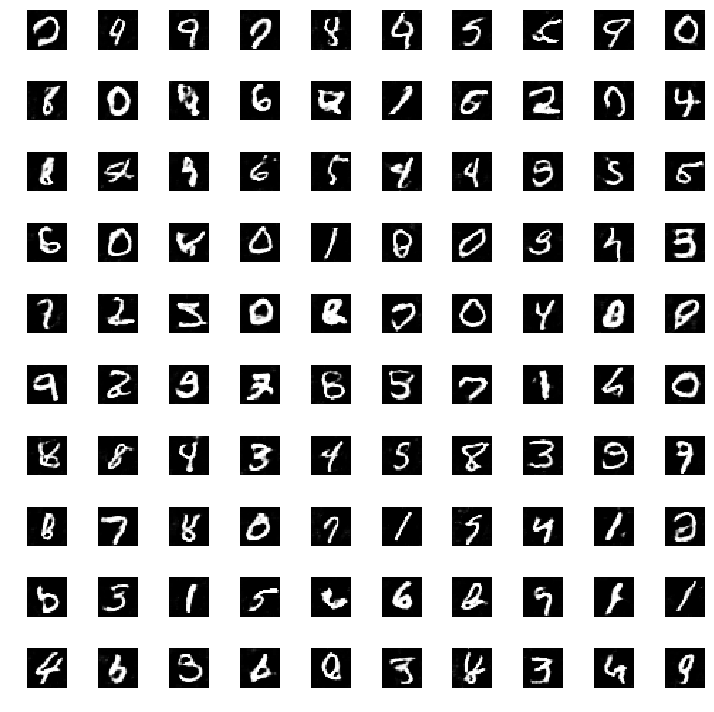

Epoch 41 D loss: 157.045593 G loss: 210.342560
Epoch 42 D loss: 156.899570 G loss: 211.764519
Epoch 43 D loss: 156.488186 G loss: 212.955567
Epoch 44 D loss: 156.331577 G loss: 213.814069
Epoch 45 D loss: 156.010854 G loss: 214.826952
Epoch 46 D loss: 155.884854 G loss: 215.900924
Epoch 47 D loss: 155.692188 G loss: 217.459310
Epoch 48 D loss: 155.343422 G loss: 218.224214
Epoch 49 D loss: 155.052180 G loss: 219.658461
Epoch 50 D loss: 154.743882 G loss: 220.434573


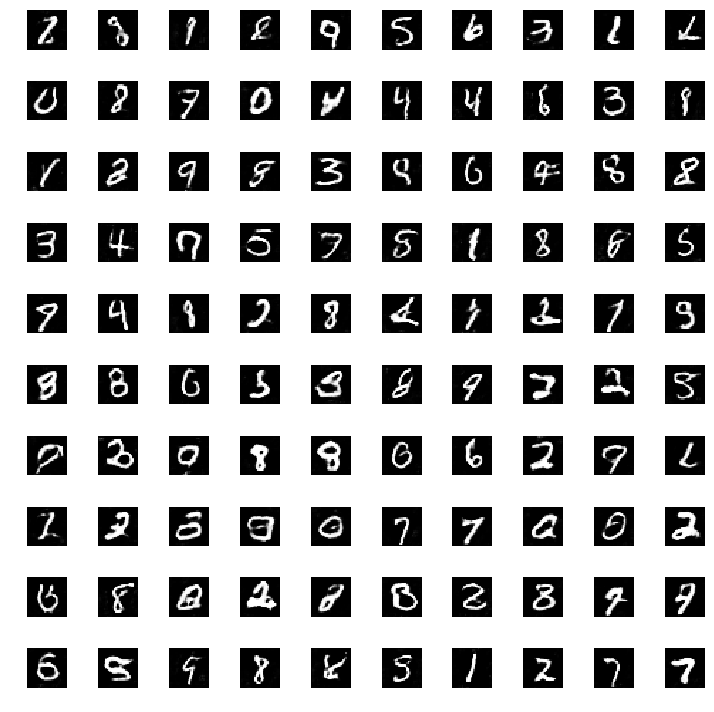

In [0]:
for epoch in range(NUM_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    for step in range(NO_OF_BATCHES):
        #randomly select 50% real images
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
        real_imgs = X_Train[idx]
        
        # generate 50% random images
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        
        # one sided label smoothing
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9 #Label Smoothing, Works well in practice
        fake_y = np.zeros((HALF_BATCH_SIZE,1))
        
        # train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #updates the weights of discriminator
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y) 
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        
        #Train Generator (Complete Model Generator + Frozen Discriminator)
        
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d D loss: %f G loss: %f" % ((epoch + 1), epoch_d_loss, epoch_g_loss))

    if (epoch+1)%10==0:
        generator.save('models/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)
       

    

In [0]:
!ls

images	images.zip  models  models.zip	sample_data


In [0]:
!zip -r /content/models.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/gan_output_epoch_30.png (deflated 7%)
  adding: content/images/gan_output_epoch_20.png (deflated 7%)
  adding: content/images/gan_output_epoch_50.png (deflated 8%)
  adding: content/images/gan_output_epoch_51.png (deflated 8%)
  adding: content/images/gan_output_epoch_10.png (deflated 7%)
  adding: content/images/gan_output_epoch_40.png (deflated 8%)


In [0]:
from google.colab import files
files.download("/content/images.zip")

In [0]:
#Outputs from ConvT_DC_GAN
save_imgs(50)

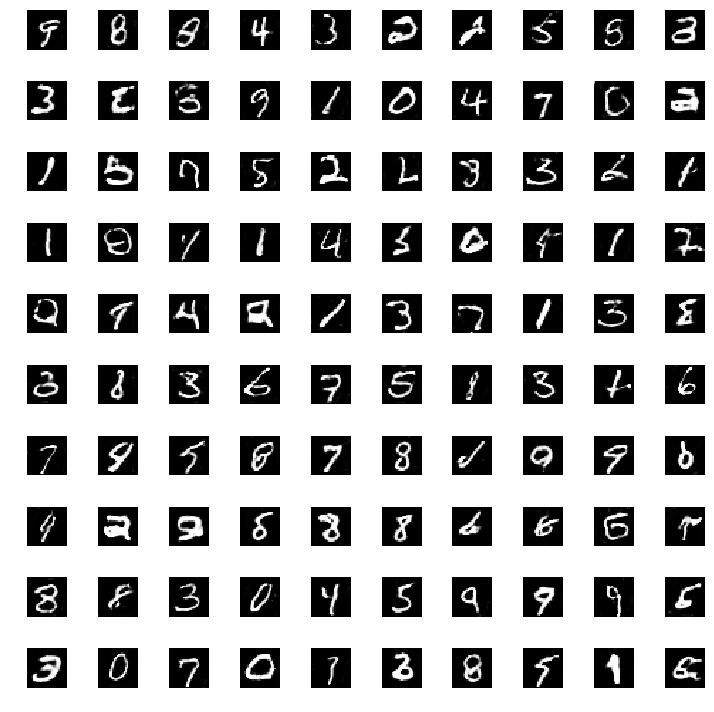

In [0]:
#Outputs from DC_GAN
save_imgs(50)